In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from maf import MAF
from made import MADE
from datasets.data_loaders import get_data, get_data_loaders
from utils.train import train_one_epoch_maf, train_one_epoch_made
from utils.validation import val_maf, val_made
from utils.test import test_maf, test_made
from utils.plot import sample_digits_maf, plot_losses

from tqdm import tqdm

In [2]:
# --------- SET PARAMETERS ----------
model_name = "maf"  # 'MAF' or 'MADE'
dataset_name = "chad"
batch_size = 1000
n_mades = 1
hidden_dims = [1]
lr = 1e-3
random_order = False
patience = 30  # For early stopping
seed = 290713
plot = False
max_epochs = 5000
# -----------------------------------

In [3]:
# Get dataset.
data = get_data(dataset_name)
train = torch.from_numpy(data.train.x)

In [4]:
dimdat = train.shape[1]
print('Each input vector is of length',dimdat)
print('There are',train.shape[0],'data vectors')

Each input vector is of length 2
There are 8100 data vectors


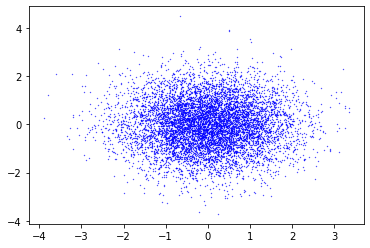

In [5]:
plt.scatter(torch.detach(train[:,0]), torch.detach(train[:,1]), c ="blue", s=0.1)
plt.show()

In [6]:
# Get data loaders.
train_loader, val_loader, test_loader = get_data_loaders(data, batch_size)

In [7]:
# Get model.
n_in = data.n_dims
n_in = train.shape[1]
if model_name.lower() == "maf":
    model = MAF(n_in, n_mades, hidden_dims, use_reverse=False)
elif model_name.lower() == "made":
    model = MADE(n_in, hidden_dims, random_order=random_order, seed=seed, gaussian=True)

In [8]:
# Get optimiser.
optimiser = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-6)

In [9]:
# Format name of model save file.
save_name = f"{model_name}_{dataset_name}_{'_'.join(str(d) for d in hidden_dims)}.pt"

In [10]:
# Initialise list for plotting.
epochs_list = []
train_losses = []
val_losses = []

In [11]:
# Initialiise early stopping.
i = 0
max_loss = np.inf

In [12]:
# Training loop.
for epoch in tqdm(range(1, max_epochs)):
    if model_name == "maf":
        train_loss = train_one_epoch_maf(model, epoch, optimiser, train_loader)
        val_loss = val_maf(model, train, val_loader)
    elif model_name == "made":
        train_loss = train_one_epoch_made(model, epoch, optimiser, train_loader)
        val_loss = val_made(model, val_loader)
    if plot:
        sample_digits_maf(model, epoch, random_order=random_order, seed=5)

    epochs_list.append(epoch)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Early stopping. Save model on each epoch with improvement.
    if val_loss < max_loss:
        i = 0
        max_loss = val_loss
        torch.save(
            model, "model_saves/" + save_name
        )  # Will print a UserWarning 1st epoch.
    else:
        i += 1

    if i < patience:
        print("Patience counter: {}/{}".format(i, patience))
    else:
        print("Patience counter: {}/{}\n Terminate training!".format(i, patience))
        break

  0%|▏                                                                                                                  | 10/4999 [00:00<01:48, 46.05it/s]

Epoch: 1 Average loss: 2.97418
setting batch stats for validation
Validation loss: 2.9789 +/- 0.0701
Patience counter: 0/30
Epoch: 2 Average loss: 2.96553
setting batch stats for validation
Validation loss: 2.9704 +/- 0.0698
Patience counter: 0/30
Epoch: 3 Average loss: 2.95721
setting batch stats for validation
Validation loss: 2.9622 +/- 0.0696
Patience counter: 0/30
Epoch: 4 Average loss: 2.94924
setting batch stats for validation
Validation loss: 2.9544 +/- 0.0695
Patience counter: 0/30
Epoch: 5 Average loss: 2.94162
setting batch stats for validation
Validation loss: 2.9469 +/- 0.0693
Patience counter: 0/30
Epoch: 6 Average loss: 2.93436
setting batch stats for validation
Validation loss: 2.9398 +/- 0.0692
Patience counter: 0/30
Epoch: 7 Average loss: 2.92742
setting batch stats for validation
Validation loss: 2.9329 +/- 0.0690
Patience counter: 0/30
Epoch: 8 Average loss: 2.92080
setting batch stats for validation
Validation loss: 2.9264 +/- 0.0689
Patience counter: 0/30
Epoch: 9

  0%|▌                                                                                                                  | 22/4999 [00:00<01:39, 50.26it/s]

Epoch: 12 Average loss: 2.89715
setting batch stats for validation
Validation loss: 2.9032 +/- 0.0685
Patience counter: 0/30
Epoch: 13 Average loss: 2.89188
setting batch stats for validation
Validation loss: 2.8981 +/- 0.0684
Patience counter: 0/30
Epoch: 14 Average loss: 2.88684
setting batch stats for validation
Validation loss: 2.8932 +/- 0.0683
Patience counter: 0/30
Epoch: 15 Average loss: 2.88204
setting batch stats for validation
Validation loss: 2.8884 +/- 0.0682
Patience counter: 0/30
Epoch: 16 Average loss: 2.87745
setting batch stats for validation
Validation loss: 2.8839 +/- 0.0681
Patience counter: 0/30
Epoch: 17 Average loss: 2.87309
setting batch stats for validation
Validation loss: 2.8797 +/- 0.0680
Patience counter: 0/30
Epoch: 18 Average loss: 2.86894
setting batch stats for validation
Validation loss: 2.8756 +/- 0.0680
Patience counter: 0/30
Epoch: 19 Average loss: 2.86504
setting batch stats for validation
Validation loss: 2.8718 +/- 0.0679
Patience counter: 0/30


  1%|▋                                                                                                                  | 28/4999 [00:00<01:37, 51.01it/s]

Epoch: 23 Average loss: 2.85152
setting batch stats for validation
Validation loss: 2.8585 +/- 0.0675
Patience counter: 0/30
Epoch: 24 Average loss: 2.84865
setting batch stats for validation
Validation loss: 2.8557 +/- 0.0675
Patience counter: 0/30
Epoch: 25 Average loss: 2.84601
setting batch stats for validation
Validation loss: 2.8531 +/- 0.0674
Patience counter: 0/30
Epoch: 26 Average loss: 2.84362
setting batch stats for validation
Validation loss: 2.8508 +/- 0.0673
Patience counter: 0/30
Epoch: 27 Average loss: 2.84146
setting batch stats for validation
Validation loss: 2.8488 +/- 0.0672
Patience counter: 0/30
Epoch: 28 Average loss: 2.83955
setting batch stats for validation
Validation loss: 2.8470 +/- 0.0671
Patience counter: 0/30
Epoch: 29 Average loss: 2.83786
setting batch stats for validation
Validation loss: 2.8453 +/- 0.0670
Patience counter: 0/30
Epoch: 30 Average loss: 2.83636
setting batch stats for validation
Validation loss: 2.8439 +/- 0.0669
Patience counter: 0/30


  1%|▉                                                                                                                  | 40/4999 [00:00<01:35, 51.76it/s]

Epoch: 34 Average loss: 2.83220
setting batch stats for validation
Validation loss: 2.8403 +/- 0.0667
Patience counter: 0/30
Epoch: 35 Average loss: 2.83157
setting batch stats for validation
Validation loss: 2.8398 +/- 0.0666
Patience counter: 0/30
Epoch: 36 Average loss: 2.83105
setting batch stats for validation
Validation loss: 2.8393 +/- 0.0666
Patience counter: 0/30
Epoch: 37 Average loss: 2.83061
setting batch stats for validation
Validation loss: 2.8389 +/- 0.0665
Patience counter: 0/30
Epoch: 38 Average loss: 2.83025
setting batch stats for validation
Validation loss: 2.8385 +/- 0.0665
Patience counter: 0/30
Epoch: 39 Average loss: 2.82994
setting batch stats for validation
Validation loss: 2.8382 +/- 0.0664
Patience counter: 0/30
Epoch: 40 Average loss: 2.82968
setting batch stats for validation
Validation loss: 2.8380 +/- 0.0664
Patience counter: 0/30
Epoch: 41 Average loss: 2.82946
setting batch stats for validation
Validation loss: 2.8378 +/- 0.0664
Patience counter: 0/30


  1%|█▏                                                                                                                 | 52/4999 [00:01<01:33, 53.00it/s]

Epoch: 45 Average loss: 2.82884
setting batch stats for validation
Validation loss: 2.8373 +/- 0.0663
Patience counter: 0/30
Epoch: 46 Average loss: 2.82873
setting batch stats for validation
Validation loss: 2.8372 +/- 0.0663
Patience counter: 0/30
Epoch: 47 Average loss: 2.82864
setting batch stats for validation
Validation loss: 2.8371 +/- 0.0663
Patience counter: 0/30
Epoch: 48 Average loss: 2.82856
setting batch stats for validation
Validation loss: 2.8370 +/- 0.0662
Patience counter: 0/30
Epoch: 49 Average loss: 2.82849
setting batch stats for validation
Validation loss: 2.8370 +/- 0.0662
Patience counter: 0/30
Epoch: 50 Average loss: 2.82842
setting batch stats for validation
Validation loss: 2.8369 +/- 0.0662
Patience counter: 0/30
Epoch: 51 Average loss: 2.82837
setting batch stats for validation
Validation loss: 2.8369 +/- 0.0662
Patience counter: 0/30
Epoch: 52 Average loss: 2.82833
setting batch stats for validation
Validation loss: 2.8368 +/- 0.0662
Patience counter: 0/30


  1%|█▍                                                                                                                 | 64/4999 [00:01<01:33, 53.03it/s]

Epoch: 56 Average loss: 2.82819
setting batch stats for validation
Validation loss: 2.8367 +/- 0.0662
Patience counter: 0/30
Epoch: 57 Average loss: 2.82817
setting batch stats for validation
Validation loss: 2.8367 +/- 0.0662
Patience counter: 0/30
Epoch: 58 Average loss: 2.82815
setting batch stats for validation
Validation loss: 2.8367 +/- 0.0662
Patience counter: 0/30
Epoch: 59 Average loss: 2.82813
setting batch stats for validation
Validation loss: 2.8367 +/- 0.0662
Patience counter: 0/30
Epoch: 60 Average loss: 2.82812
setting batch stats for validation
Validation loss: 2.8367 +/- 0.0662
Patience counter: 0/30
Epoch: 61 Average loss: 2.82810
setting batch stats for validation
Validation loss: 2.8366 +/- 0.0662
Patience counter: 0/30
Epoch: 62 Average loss: 2.82809
setting batch stats for validation
Validation loss: 2.8366 +/- 0.0661
Patience counter: 0/30
Epoch: 63 Average loss: 2.82807
setting batch stats for validation
Validation loss: 2.8366 +/- 0.0661
Patience counter: 0/30


  1%|█▌                                                                                                                 | 70/4999 [00:01<01:33, 52.76it/s]

Epoch: 67 Average loss: 2.82802
setting batch stats for validation
Validation loss: 2.8366 +/- 0.0661
Patience counter: 0/30
Epoch: 68 Average loss: 2.82801
setting batch stats for validation
Validation loss: 2.8366 +/- 0.0661
Patience counter: 0/30
Epoch: 69 Average loss: 2.82800
setting batch stats for validation
Validation loss: 2.8366 +/- 0.0661
Patience counter: 0/30
Epoch: 70 Average loss: 2.82799
setting batch stats for validation
Validation loss: 2.8366 +/- 0.0661
Patience counter: 0/30
Epoch: 71 Average loss: 2.82799
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 0/30
Epoch: 72 Average loss: 2.82798
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 0/30
Epoch: 73 Average loss: 2.82797
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 0/30
Epoch: 74 Average loss: 2.82796
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 1/30


  2%|█▉                                                                                                                 | 82/4999 [00:01<01:36, 50.85it/s]

setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 3/30
Epoch: 77 Average loss: 2.82795
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 4/30
Epoch: 78 Average loss: 2.82794
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 5/30
Epoch: 79 Average loss: 2.82794
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 6/30
Epoch: 80 Average loss: 2.82794
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 7/30
Epoch: 81 Average loss: 2.82794
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 8/30
Epoch: 82 Average loss: 2.82793
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 9/30
Epoch: 83 Average loss: 2.82793
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 10/30
Epoch: 84 Average loss: 2.82793

  2%|██▏                                                                                                                | 94/4999 [00:01<01:31, 53.62it/s]

Epoch: 88 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 15/30
Epoch: 89 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 16/30
Epoch: 90 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 17/30
Epoch: 91 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 18/30
Epoch: 92 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 19/30
Epoch: 93 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 20/30
Epoch: 94 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 21/30
Epoch: 95 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter

  2%|██▎                                                                                                               | 102/4999 [00:01<01:35, 51.42it/s]

Epoch: 100 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 27/30
Epoch: 101 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 28/30
Epoch: 102 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 29/30
Epoch: 103 Average loss: 2.82792
setting batch stats for validation
Validation loss: 2.8365 +/- 0.0661
Patience counter: 30/30
 Terminate training!


In [13]:
model.train()

MAF(
  (layers): ModuleList(
    (0): MAFLayer(
      (made): MADE(
        (model): Sequential(
          (0): MaskedLinear(in_features=2, out_features=1, bias=True)
          (1): ReLU()
          (2): MaskedLinear(in_features=1, out_features=4, bias=True)
        )
      )
    )
    (1): BatchNormLayer()
  )
)

In [14]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0929, -0.0651]], requires_grad=True),
 Parameter containing:
 tensor([-0.3100], requires_grad=True),
 Parameter containing:
 tensor([[-0.5167],
         [-0.3583],
         [ 0.2437],
         [ 0.2315]], requires_grad=True),
 Parameter containing:
 tensor([ 0.9964,  0.5437, -0.0994, -0.2589], requires_grad=True),
 Parameter containing:
 tensor([[0.0009, 0.0009]], requires_grad=True),
 Parameter containing:
 tensor([[-2.3360e-08,  4.6347e-06]], requires_grad=True)]

In [15]:
from scipy.stats import multivariate_normal

truedens = multivariate_normal.pdf(train,np.zeros(dimdat),np.identity(dimdat))

In [16]:
foo = model(torch.tensor(data.train.x))

In [17]:
estdens=multivariate_normal.pdf(torch.detach(foo[0]),np.zeros(dimdat),np.identity(dimdat))*np.exp(np.array(torch.detach(foo[1])))

In [18]:
distfromcent = np.sqrt(train[:,0]**2 + train[:,1]**2)

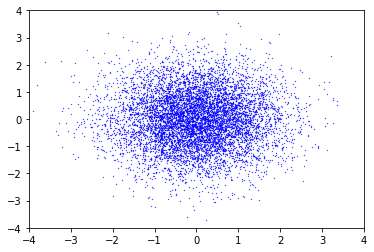

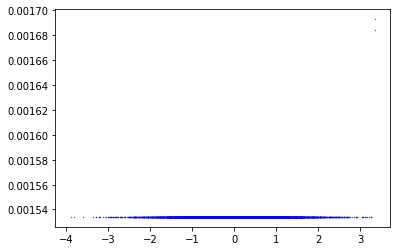

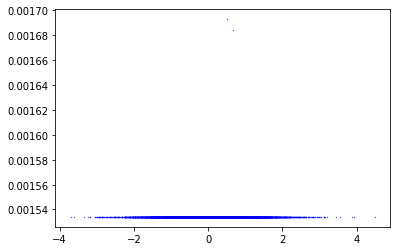

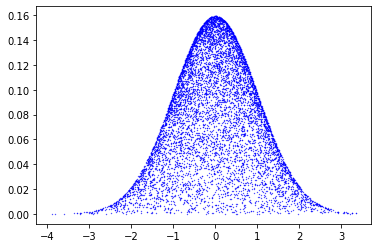

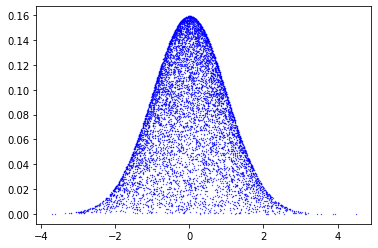

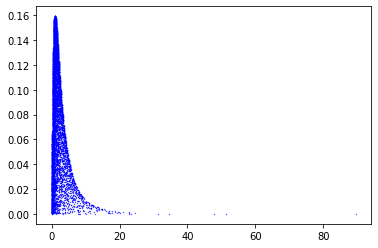

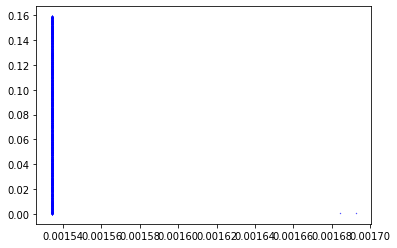

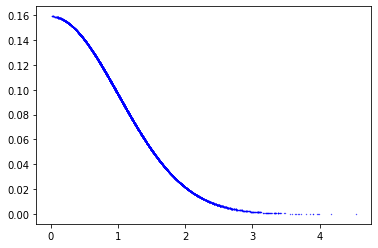

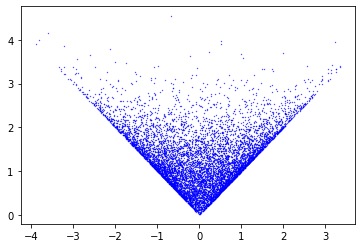

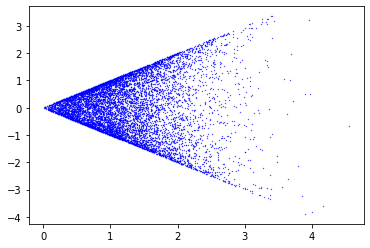

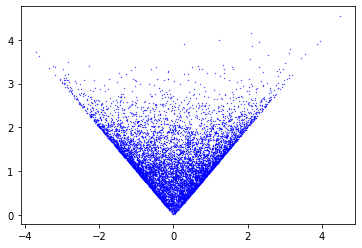

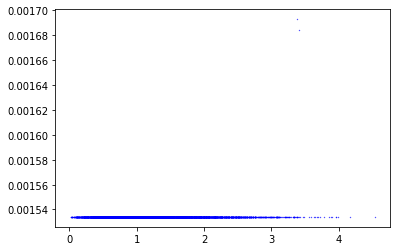

In [19]:
plt.scatter(torch.detach(foo[0][:,0]), torch.detach(foo[0][:,1]), c ="blue",s=0.1)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

plt.scatter(torch.detach(foo[0][:,0]), torch.detach(foo[1]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,1]), torch.detach(foo[1]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,0]), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,1]), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(np.exp(torch.detach(foo[0][:,1])), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[1]), truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(distfromcent, truedens, c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,0]), distfromcent, c ="blue",s=0.1)
plt.show()

plt.scatter(distfromcent, torch.detach(foo[0][:,0]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo[0][:,1]), distfromcent, c ="blue",s=0.1)
plt.show()

plt.scatter(distfromcent, torch.detach(foo[1]), c ="blue",s=0.1)
plt.show()

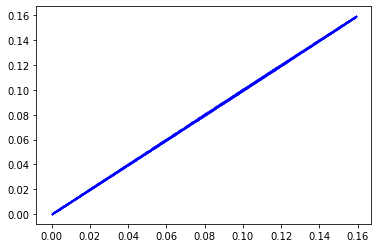

In [20]:
plt.scatter(truedens, estdens, c ="blue",s=0.1)
plt.show()

# THE STEPS

The steps below reconstruct the passage of the training set through the network.

Note that this code is only designed to work with a single node in a single layer.

In [21]:
model

MAF(
  (layers): ModuleList(
    (0): MAFLayer(
      (made): MADE(
        (model): Sequential(
          (0): MaskedLinear(in_features=2, out_features=1, bias=True)
          (1): ReLU()
          (2): MaskedLinear(in_features=1, out_features=4, bias=True)
        )
      )
    )
    (1): BatchNormLayer()
  )
)

This is the training set.

In [22]:
torch.tensor(data.train.x)

tensor([[ 0.4904, -0.1470],
        [ 0.6399,  1.5220],
        [-0.2333, -0.2433],
        ...,
        [ 1.8092, -0.8637],
        [-0.2077, -0.5469],
        [-0.5501,  0.1710]])

These are the complete weights of the model.

In [23]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0929, -0.0651]], requires_grad=True),
 Parameter containing:
 tensor([-0.3100], requires_grad=True),
 Parameter containing:
 tensor([[-0.5167],
         [-0.3583],
         [ 0.2437],
         [ 0.2315]], requires_grad=True),
 Parameter containing:
 tensor([ 0.9964,  0.5437, -0.0994, -0.2589], requires_grad=True),
 Parameter containing:
 tensor([[0.0009, 0.0009]], requires_grad=True),
 Parameter containing:
 tensor([[-2.3360e-08,  4.6347e-06]], requires_grad=True)]

The first set of weights.

In [24]:
list(model.parameters())[0][0]

tensor([ 0.0929, -0.0651], grad_fn=<SelectBackward0>)

Take the product of the training set and the set of weights.

In [25]:
foo5 = torch.matmul(torch.tensor(data.train.x),list(model.parameters())[0].reshape(2,1))

Add on the bias term.

In [26]:
foo6 = foo5 + list(model.parameters())[1]

Apply ReLU

In [27]:
foo7 = torch.maximum(foo6,torch.zeros([torch.tensor(data.train.x).shape[0],1]))

This gets multiplied times the next set of weights, and the bias term is added.

In [28]:
list(model.parameters())[2]

Parameter containing:
tensor([[-0.5167],
        [-0.3583],
        [ 0.2437],
        [ 0.2315]], requires_grad=True)

In [29]:
list(model.parameters())[2].reshape(1,4)

tensor([[-0.5167, -0.3583,  0.2437,  0.2315]], grad_fn=<ReshapeAliasBackward0>)

In [30]:
list(model.parameters())[3]

Parameter containing:
tensor([ 0.9964,  0.5437, -0.0994, -0.2589], requires_grad=True)

In [31]:
foo8 = torch.matmul(foo7,list(model.parameters())[2].reshape(1,4))+list(model.parameters())[3]

This is of n by 4. The first two columns are the f_mu function evaluated at the two input values, while the second two columns are the f_alpha function evaluated at these same points.

In [32]:
[mu,alpha]=foo8.chunk(2,1)

In [33]:
mu

tensor([[0.9964, 0.5437],
        [0.9964, 0.5437],
        [0.9964, 0.5437],
        ...,
        [0.9964, 0.5437],
        [0.9964, 0.5437],
        [0.9964, 0.5437]], grad_fn=<SplitBackward0>)

In [34]:
alpha

tensor([[-0.0994, -0.2589],
        [-0.0994, -0.2589],
        [-0.0994, -0.2589],
        ...,
        [-0.0994, -0.2589],
        [-0.0994, -0.2589],
        [-0.0994, -0.2589]], grad_fn=<SplitBackward0>)

Compare this with Equation (4) in the paper.

In [35]:
usubi = (torch.tensor(data.train.x) - mu)*torch.exp(0.5*alpha)

Compare this with the following

In [36]:
AfterLayer0 = model.layers[0](torch.tensor(data.train.x))

In [37]:
AfterLayer0[0]

tensor([[-0.4815, -0.6068],
        [-0.3392,  0.8596],
        [-1.1701, -0.6915],
        ...,
        [ 0.7735, -1.2365],
        [-1.1457, -0.9582],
        [-1.4715, -0.3275]], grad_fn=<MulBackward0>)

In [38]:
usubi

tensor([[-0.4815, -0.6068],
        [-0.3392,  0.8596],
        [-1.1701, -0.6915],
        ...,
        [ 0.7735, -1.2365],
        [-1.1457, -0.9582],
        [-1.4715, -0.3275]], grad_fn=<MulBackward0>)

In [39]:
sum(abs(AfterLayer0[0] - usubi)>0)

tensor([22, 22])

This should look like a bivariate standard normal.

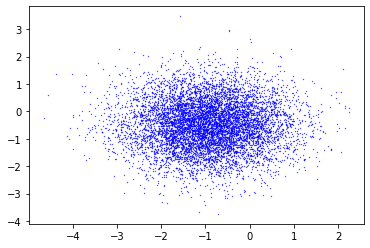

In [40]:
plt.scatter(torch.detach(usubi[:,0]), torch.detach(usubi[:,1]), c ="blue", s=0.1)
plt.show()

In [41]:
print(torch.mean(usubi,0))
print(torch.var(usubi,0))

tensor([-0.9483, -0.4825], grad_fn=<MeanBackward1>)
tensor([0.9038, 0.7738], grad_fn=<VarBackward0>)


In [42]:
model.layers[1].gamma

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)

These two should give the same result.

In [43]:
AfterLayer1 = model(torch.tensor(data.train.x))
AfterLayer1b = model.layers[1](AfterLayer0[0])

abs(AfterLayer1[0] - AfterLayer1b[0]).sum()

tensor(0., grad_fn=<SumBackward0>)

You might think that the following would give the same as well...

In [44]:
from batch_norm_layer import BatchNormLayer

bn = BatchNormLayer(2)
foo10 = bn(usubi)

...but it does not:

In [45]:
abs(AfterLayer1[0] - foo10[0]).sum()

tensor(12.7249, grad_fn=<SumBackward0>)

The reason for the difference is in the `gamma` parameter used by `BatchNormLayer`.

In [46]:
print(model.layers[1].gamma)

print(bn.gamma)

Parameter containing:
tensor([[0.0009, 0.0009]], requires_grad=True)
Parameter containing:
tensor([[0., 0.]], requires_grad=True)


Redo the batch normalization using the same value of `gamma`.

In [51]:
bn.gamma = model.layers[1].gamma
foo10 = bn(usubi)
abs(AfterLayer1[0] - foo10[0]).sum()

tensor(1.1229, grad_fn=<SumBackward0>)

There is not perfect agreement, but the results below show that it is quite close.

In [48]:
max(abs(AfterLayer1[0][:,0]-foo10[0][:,0]))

tensor(0.0525, grad_fn=<UnbindBackward0>)

In [49]:
max(abs(AfterLayer1[0][:,1]-foo10[0][:,1]))

tensor(0.0089, grad_fn=<UnbindBackward0>)

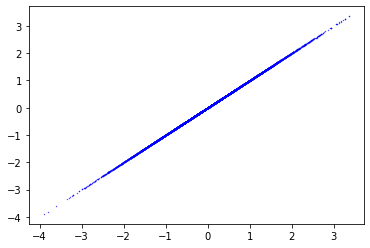

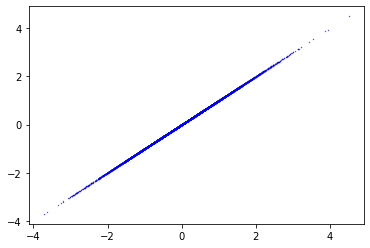

In [50]:
plt.scatter(torch.detach(foo10[0][:,0]), torch.detach(AfterLayer1[0][:,0]), c ="blue",s=0.1)
plt.show()

plt.scatter(torch.detach(foo10[0][:,1]), torch.detach(AfterLayer1[0][:,1]), c ="blue",s=0.1)
plt.show()